A notebook for creating and exploring `MultiGraph`s, directed and undirected.
It relies on using NetworkX, which has its documentation located [here](https://networkx.org/documentation/stable/reference/introduction.html).

In [20]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import os

#### Function to create a new folder in the current directory

In [33]:
#create images folder, if one does not already exist
def newfolder(foldername, allowable="-_ "):
    '''
    Uses os package to create a new folder named foldername in the current directory.
    
    Parameters:
        foldername (String) : the desired name of the folder, with any allowed special characters determined by allowable
        allowable (String) : the preferably with any special characters being - or _
        
    Returns:
        Creates a new folder called foldername in the current directory, unless a folder with that name already exists there.
    '''
    if not foldername.isalnum(): #if foldername contains special characters
        specials = string.punctuation+" " #gets punctuation symbols from the string package, concatenates single space
        for allowed in allowable:
            specials = specials.replace(allowed,"") #remove allowed special characters from the punctuation string
        #check if any of the other special characters are in foldername
        findspecial = sum([char in foldername for char in specials])
        if findspecial>0: #if there are special characters that are not allowed
            if allowable=="-_ ":
                msg="The folder name contained special characters other than ' ', '-' and '_'."
            else:
                msg="The folder name contained special characters that were not specified in the 'allowable' parameter."
            print(msg) #prints an explanatory error message
            return None #leaves the function before creating a folder
    
    current = os.curdir
    newpath = os.path.join(current,foldername)
    if not os.path.exists(newpath):
        os.makedirs(newpath)

In [35]:
#create images folder
newfolder("images")

## Creating a `MultiGraph` with random values

In [108]:
#generate random pairs of edges and add to graph
mGraph = nx.MultiGraph()
amt = 15
loops = 2
for j in range(loops):
    for i in range(1,amt):
        mGraph.add_edge(np.random.randint(amt*2),np.random.randint(amt*2),weight=np.random.randint(1,6))

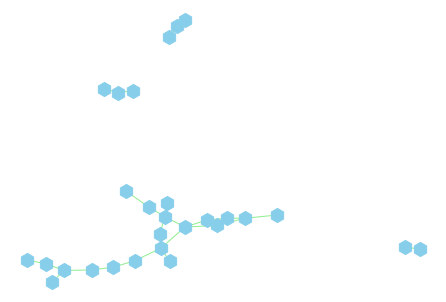

In [109]:
nx.draw(mGraph,node_shape="h",node_color="skyblue",edge_color="lightgreen",node_size=200)

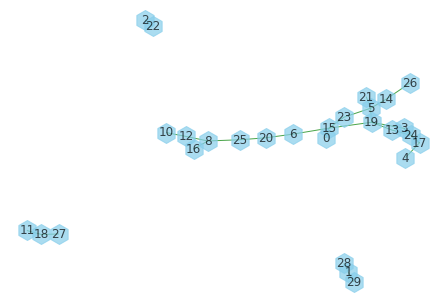

In [110]:
nx.draw(mGraph,with_labels=True,node_shape="h",node_color="skyblue",edge_color="green",alpha=0.7,node_size=400)

In [111]:
mGraph[25]

AdjacencyView({8: {0: {'weight': 3}}, 20: {0: {'weight': 5}}})

In [76]:
for u, v, keys, weight in mGraph.edges(data="weight", keys=True):
    if weight is None:
        #print(u,v,keys,weight)
        pass